# Implementation of KNN algorithm for predicting song danceability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df1= pd.read_csv('rock-spotify.csv')
df1=df1.drop(['index','release_date','length','danceability.1','key','loudness','key','time_signature','liveness'], axis=1)

In [3]:
df1.rename(columns = {'popularity':'Popularity','artist':'Artist','name':'Title','danceability':'Danceability', 'energy':'Energy','speechiness':'Speechiness', 'acousticness':'Acousticness', 'instrumentalness':'Instrumentalness','valence':'Valence', 'tempo':'Tempo'}, inplace = True)

In [4]:
df=df1.drop(['Artist','Title'],axis=1)

In [5]:
df = df[['Energy','Speechiness','Acousticness','Instrumentalness','Valence','Tempo','Popularity','Danceability']]
df.head(5)

,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Tempo,Popularity,Danceability
0,0.912,0.0564,0.000025,0.000173,0.720,116.761,74,0.502
1,0.340,0.0339,0.580000,0.003200,0.197,82.433,78,0.338
2,0.402,0.0536,0.288000,0.000000,0.228,143.883,74,0.392
3,0.257,0.0252,0.907000,0.183000,0.169,75.752,77,0.547
4,0.863,0.0338,0.038300,0.031700,0.931,136.302,77,0.723


In [6]:
df["Danceability"] = np.where(df["Danceability"] <0.5, 1, 0)
df.head(5)

,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Tempo,Popularity,Danceability
0,0.912,0.0564,0.000025,0.000173,0.720,116.761,74,0
1,0.340,0.0339,0.580000,0.003200,0.197,82.433,78,1
2,0.402,0.0536,0.288000,0.000000,0.228,143.883,74,1
3,0.257,0.0252,0.907000,0.183000,0.169,75.752,77,0
4,0.863,0.0338,0.038300,0.031700,0.931,136.302,77,0


In [7]:
X = df.iloc[:, :-1].values
y=df.iloc[:,7].values

In [8]:
y

array([0, 1, 1, ..., 0, 0, 1])

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Generating training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Using sklearn for k nearest neighbors

In [12]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [13]:
y_pred = classifier.predict(X_test)

Confusion matrix

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[443 152]
 [190 312]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       595
           1       0.67      0.62      0.65       502

    accuracy                           0.69      1097
   macro avg       0.69      0.68      0.68      1097
weighted avg       0.69      0.69      0.69      1097



Computing error

In [15]:
error = []

# Calculating error for K values between 1 and 500
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

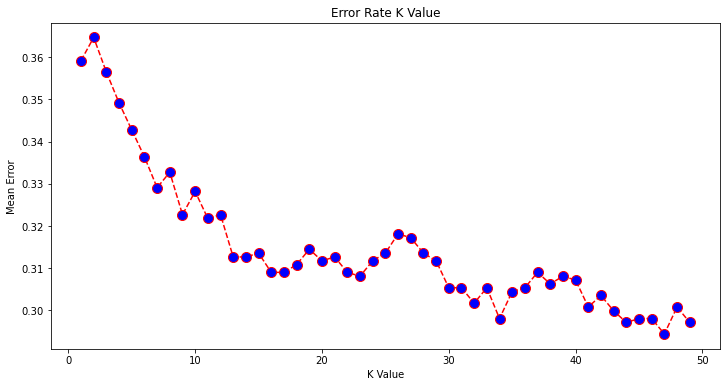

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')